In [1]:
#Prepare the data
#Convert images to data frame and add labels

import os as os
import pandas as pd
import numpy as np
root_image="./Images"
training_images=""
training_images= root_image + "/TrainingImages"
training_images_path= root_image + "/TrainingImages"

subjects = []

working_image_size = (100,100)

def loadImages(dir_path):
    import cv2
    #Reads a directory of images and returns set of images stored as a data frame
    #returns a 2D numpy array of images. format - File_Name, <One Column Per Pixel>
    
    da = np.empty([100,working_image_size[0]*working_image_size[1]])
    counter = 0
    
    for f in os.listdir(dir_path):
        print(f)
        if(f.endswith(".JPG")):
            filePath= dir_path +"/" + f
            #print("Found JPG file ",filePath)
            img = cv2.resize(cv2.imread(filePath,cv2.IMREAD_GRAYSCALE),working_image_size)
            #print("Shape before reshape",img.shape)
            img = img.reshape(-1,working_image_size[0]*working_image_size[1])
            da[counter] = img[0]
            counter = counter + 1
            #print("Shape after reshape",img.shape)
            #print("Shape after reshape",img.head(1))  
    
    #print("Shape after reshape",da.shape)
    #print("Shape after reshape",da)
    return da,counter

def createLabel(label,nr):
    print(label)
    
    labels = [label for i in range(0,nr)]
    df_label = np.array(labels)
    #df_label = df_label.reshape(nr,-1)
    
      
    return df_label

for subject in subjects:
    subject_dir_path = training_images+"/TrainingImages"+"_"+subject
    print("Using directory " , subject_dir_path, " to load training images for ", subject )
    df_data,nr_of_training_images  = loadImages(subject_dir_path)
    print(df_data.shape)
    print(nr_of_training_images)
    df_label = createLabel(subject,nr_of_training_images)
    print(df_label)
    
#Load images and create labels from Image titles
def getLabelFromFileName(filename):
    l= filename.split('__')
    
    if(len(l) == 0):
        print("error")
        label = "Unknow"
    else:
        label = l[0]
    
    print("file ", filename, "label ", label)
    return label
    

def loadImageAndLabel(dir_path):
    import cv2
    labelList = []
    counter = 0
    da = np.empty([100,working_image_size[0]*working_image_size[1]])
    
    files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path,f))]
    
    for f in files:
        #print("processing file ",f )
        fp = dir_path + "/" + f
        
        #Append label
        labelList.append(getLabelFromFileName(f))
        
        #Load file and store as single rom in the data array
        img = cv2.resize(cv2.imread(fp,cv2.IMREAD_GRAYSCALE),working_image_size)
        img = img.reshape(-1,working_image_size[0]*working_image_size[1])
        da[counter] = img[0]
        counter = counter + 1
    
    #Basic sanity check
    if(len(labelList)!=counter):
        print("Data reading problem, please check")
    
    dl = np.array(labelList)
    
    return da,dl,counter  
        
        
       
    
df_data, df_label,count_of_training_images = loadImageAndLabel(training_images_path)
print(df_label,count_of_training_images)



file  BhlMummy__Training_DSC_0699 (1).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (10).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (11).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (12).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (2).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (3).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (4).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (5).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (6).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (7).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (8).JPG label  BhlMummy
file  BhlMummy__Training_DSC_0699 (9).JPG label  BhlMummy
file  Kunika__Training_DSC_0063 (1).JPG label  Kunika
file  Kunika__Training_DSC_0063 (2).JPG label  Kunika
file  Kunika__Training_DSC_0063 (3).JPG label  Kunika
file  Kunika__Training_DSC_0063 (4).JPG label  Kunika
file  Kunika__Training_DSC_0063 (5).JPG label  Kunika
file  Kunika__Training_DSC_0063

['BhlMummy' 'BhlMummy' 'BhlMummy' 'BhlMummy' 'Kunika' 'Kunika' 'Kunika'
 'Kunika' 'SeaGull' 'SeaGull' 'Shiv' 'Shiv' 'Shiv' 'Shiv' 'Shiv' 'Shiv']


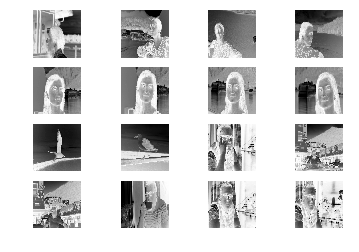

['Shiv' 'BhlMummy' 'Shiv' 'Shiv' 'Shiv' 'Shiv' 'Kunika' 'Kunika' 'Shiv'
 'Shiv' 'Kunika' 'BhlMummy' 'Kunika' 'Kunika' 'Kunika' 'Kunika']
Prediction accuracy for label  Kunika is :  50.0
Prediction accuracy for label  SeaGull is :  0.0
Prediction accuracy for label  Shiv is :  0.0
Prediction accuracy for label  BhlMummy is :  25.0
==== Confusion Matrix ==== 
{'Kunika', 'SeaGull', 'Shiv', 'BhlMummy'}
** For Label  Kunika  **
Predicted  False  True 
Actual                 
False          7      5
True           2      2

** For Label  SeaGull  **
Predicted  False
Actual          
False         14
True           2

** For Label  Shiv  **
Predicted  False  True 
Actual                 
False          3      7
True           6      0

** For Label  BhlMummy  **
Predicted  False  True 
Actual                 
False         11      1
True           3      1

PrecisionScore for label   Kunika is 0.285714285714
PrecisionScore for label   SeaGull is 0.0
PrecisionScore for label   Shiv is 0.0
Prec

C:\Users\shivsood\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shivsood\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
#Create statified folds on data, train a model on each of the cross folds and Calculate Performance metric

def predictionAccuracy(y_pred,y_test):
    for label in set(y_test):
        print("Prediction accuracy for label " , label, "is : ", sum(y_pred[y_test==label]==label)/len(y_pred[y_test==label])*100)
  


def plot_roc_curve(fpr, tpr, label=None):
            import matplotlib.pyplot as plt
            plt.plot(fpr, tpr, linewidth=2, label=label)
            plt.plot([0, 1], [0, 1], 'k--')
            plt.axis([0, 1, 0, 1])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            
def cfMatrixPerLabel(y_pred,y_test):
    import pandas as pd
    print("==== Confusion Matrix ==== ")
    
    labels = set(y_test)
    print(labels)
    for label in labels:
        print("** For Label ", label, " **")
        y_as = pd.Series(y_test==label, name='Actual')
        y_ps = pd.Series(y_pred==label, name='Predicted')
        df_confusion = pd.crosstab(y_as, y_ps)
        print(df_confusion)
        print("")
        

    
    
def cfMatrix(pred_label,actual_label):
    import pandas as pd
    y_actu = pd.Series(actual_label, name='Actual')
    y_pred = pd.Series(pred_label, name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)
    #print(df_confusion)
    #print("")
    
def precision(y_pred,y_test):
    from sklearn.metrics import precision_score       
    for label in set(y_test):
        print("PrecisionScore for label  ",label ,"is", precision_score(y_test==label,y_pred==label))    
 
def recall(y_pred,y_test):
    from sklearn.metrics import recall_score
    for label in set(y_test):
        print("RecallScore for label  ",label ,"is", recall_score(y_test==label,y_pred==label))
    
def f1score(y_pred,y_test):
    from sklearn.metrics import f1_score
    for label in set(y_test):
        print("F1Score for label  ",label ,"is", f1_score(y_test==label,y_pred==label))
    
       
def calculateMetric(pred_label,actual_label):
    print("=================================================================================")
    predictionAccuracy(pred_label,actual_label)
    cfMatrixPerLabel(pred_label,actual_label)   
    precision(pred_label,actual_label)
    recall(pred_label,actual_label)
    f1score(pred_label,actual_label)
    print("=================================================================================")
    
def imgFromArray(arrOfImages):
    %matplotlib inline
    import matplotlib
    import matplotlib.pyplot as plt
    import math
    
    x = math.ceil(math.sqrt(len(arrOfImages)))
    fig, axes = plt.subplots(nrows=x, ncols=x)

    for index in range(0,len(arrOfImages)):
        plt.subplot(x, x, index+1)
        ar = arrOfImages[index]
        ar_s = ar.reshape(working_image_size)
        plt.imshow(ar_s, cmap = matplotlib.cm.binary,
               interpolation="nearest")
        plt.axis("off")
    
    plt.show()
    
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

skFolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index, test_index in skFolds.split(df_data[0:count_of_training_images],df_label[0:count_of_training_images]):
    x_train, y_train = df_data[train_index],df_label[train_index]
         
    x_test, y_test  =  df_data[test_index],df_label[test_index]
    
    # Train
    sgd_clf = SGDClassifier(random_state=42)
    sgd_clf.fit(x_train,y_train)
    
    #Test
    print(y_test)
    imgFromArray(x_test)
    y_pred = sgd_clf.predict(x_test)
    print(y_pred)
    
    #Metric
    predictionAccuracy(y_pred,y_test)
    cfMatrixPerLabel(y_pred,y_test)   
    precision(y_pred,y_test)
    recall(y_pred,y_test)
    f1score(y_pred,y_test)
            
    break
    


In [13]:
# Use the data to train a classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(df_data[0:count_of_training_images-2], df_label[0:count_of_training_images-2])

print(sgd_clf.predict(df_data[count_of_training_images-2:count_of_training_images]))
print(df_label[count_of_training_images-2:count_of_training_images])


['Shiv' 'Shiv']
['Shiv' 'Shiv']


In [62]:
import cv2

img = cv2.imread("./Images/TrainingImages/TrainingImages_Shiv/DSC_0729.jpg",cv2.IMREAD_GRAYSCALE)
img_s = cv2.resize(img,(200, 200))
print(type(img))
print(img.shape)
print(type(img_s))
print(img_s.shape)

#Re-shape to 1D array
img_s_1d = img_s.reshape(-1,200*200)
print(img_s_1d)
img_s_2d_c = img_s_1d.reshape(200,200)

<class 'numpy.ndarray'>
(3264, 4928)
<class 'numpy.ndarray'>
(200, 200)
[[154 154 154 ..., 125 127 126]]


(-0.5, 199.5, 199.5, -0.5)

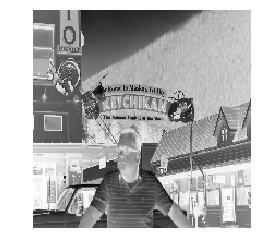

In [63]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(img_s_2d_c, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")